Task - Identify Intents on dataset

- what are the diffrent intents ?
- for each intent - find 3 examples


Approches:
 - Use Bert variation to generate embeddings then use clustering algorithem hoping to find diffrent groups (similar sentences would hopefully b grouped together)
 - Use Topic Modeling to understand the diffrent topics of conversation
 -Hybrid

TO RUN:: make sure that the file is uploded to the session content
Result : intent_examples.csv

# Setup -
libraries and such

In [2]:
!pip install pyLDAvis
# Install necessary libraries
!pip install transformers sentence-transformers umap-learn scikit-learn matplotlib pandas
!pip install keybert
! pip install sentence_transformers
!pip install yake
!pip install umap-learn
!pip install hdbscan
!pip install spacy
!python -m spacy download en_core_web_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 79.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# Data
clean preprocess

In [47]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Load the data
df = pd.read_csv('/content/sentences.csv')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function for text cleaning with lemmatization
def clean_text_with_lemmatization(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())  # Remove special characters and convert to lowercase
    words = nltk.word_tokenize(text)  # More accurate tokenization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply cleaning to the 'sentence' column
df['cleaned_sentence'] = df['sentence'].apply(clean_text_with_lemmatization)

# Drop rows with empty cleaned sentences (if any)
df.dropna(subset=['cleaned_sentence'], inplace=True)

# Display the first few cleaned sentences
print(df[['sentence', 'cleaned_sentence']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                            sentence  \
0  You know, that should work perfectly. Let's re...   
1  That's great to hear. Can you provide more spe...   
2  Well, my wife and I both work from home, and w...   
3  Wait, so you're telling me that even if I pay ...   
4  I see. And how much does this service typicall...   

                                    cleaned_sentence  
0                 know work perfectly let reschedule  
1  thats great hear provide specific minimum focu...  
2  well wife work home need separate line busines...  
3  wait youre telling even pay caller id could st...  
4                    see much service typically cost  


# Topic modeling

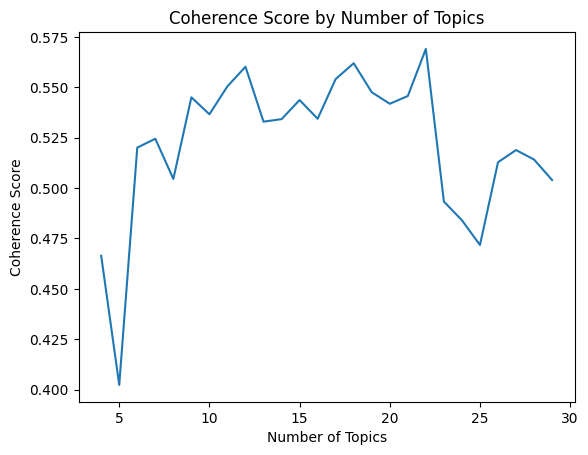

Optimal number of topics: 22
Topic 0:
- Her maiden name is Singh.
- I see, that's still quite a jump in pricing though. Do you have any other mobile plan options that might be more budget-friendly long-term?
- That can't be right. Let me double-check the card details.
- That's strange, I haven't received any bills or notices from your company in months. Are you sure you have the correct mailing address?
- It's 753159642.


Topic 1:
- Hmm okay, maybe I'll just stick with the $90 Unlimited Plus then to get all those premium data perks. That highest speed unlimited data is important for me.
- Yes, my account number is 8675309. I'm currently on your unlimited nationwide talk and text plan for $65 per month.
- $80 seems quite expensive, is that the only unlimited option? I may not need truly unlimited data.
- Hi, I need to downgrade my internet and TV package because the current plan is too expensive for me.
- That's correct, and while it's been a good plan, it's just not fitting my budget 

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
21    -0.080857  0.232107       1        1  6.508838
3     -0.041803 -0.024568       2        1  6.275471
11    -0.111876  0.002269       3        1  6.253563
1     -0.125039 -0.147343       4        1  5.893494
16    -0.052645  0.116221       5        1  5.228724
12    -0.111609 -0.240730       6        1  5.220583
5     -0.078187  0.158674       7        1  4.857689
6     -0.024908 -0.132598       8        1  4.717462
8      0.385612 -0.015654       9        1  4.488298
20    -0.057641 -0.083604      10        1  4.448162
18    -0.084857 -0.157158      11        1  4.446433
10    -0.064306  0.201495      12        1  4.340459
4      0.378339 -0.032105      13        1  4.312811
0      0.016576 -0.052275      14        1  4.165842
9     -0.091082 -0.069647      15        1  4.071871
14     0.042888  0.101861      16        1  3.992494
7     -0.098950 -0.104651      17        1  3.914313
15     0.052650  0.036787      18        1  3.872354
19    -0.039007  0.188282      19        1  3.801989
17    -0.072627  0.032222      20        1  3.486616
2     -0.040530  0.025467      21        1  2.968822
13     0.299858 -0.035052      22        1  2.733714, topic_info=             Term         Freq        Total Category  logprob  loglift
1130       number  1274.000000  1274.000000  Default  30.0000  30.0000
17        account  1194.000000  1194.000000  Default  29.0000  29.0000
1726        thank   667.000000   667.000000  Default  28.0000  28.0000
1646       street   337.000000   337.000000  Default  27.0000  27.0000
37        address   484.000000   484.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
1678         sure    68.706194   837.032612  Topic22  -3.6813   1.0995
1960          yes    85.077637  1627.375888  Topic22  -3.4676   0.6483
1575   smartphone    23.998139    69.967797  Topic22  -4.7332   2.5295
1215  performance    21.037106    38.155243  Topic22  -4.8649   3.0041
149     available    19.566406   216.977056  Topic22  -4.9374   1.1935

[1383 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0        14  0.978292      abc
1         1  0.931860  ability
1         3  0.042357  ability
2         1  0.123726     able
2         3  0.058224     able
...     ...       ...      ...
1963     16  0.943411    youll
1964      7  0.831177    young
1968      8  0.034453      zip
1968      9  0.964689      zip
1969     11  0.966079     zone

[4104 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[22, 4, 12, 2, 17, 13, 6, 7, 9, 21, 19, 11, 5, 1, 10, 15, 8, 16, 20, 18, 3, 14])

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
import pyLDAvis
pyLDAvis.enable_notebook()


docs_raw = df['cleaned_sentence'].tolist()

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(strip_accents='unicode',
                                   stop_words='english',
                                   lowercase=True,
                                   token_pattern=r'\b[a-zA-Z]{3,}\b',
                                   max_df=0.5,
                                   min_df=10)
dtm_tfidf = tfidf_vectorizer.fit_transform(docs_raw)

# Function to compute coherence score
def compute_coherence_values(dtm, vectorizer, texts, start=2, limit=10, step=1):
    coherence_values = []
    model_list = []
    feature_names = vectorizer.get_feature_names_out()

    for num_topics in range(start, limit, step):
        model = LatentDirichletAllocation(n_components=num_topics, random_state=0)
        model.fit(dtm)
        model_list.append(model)

        # Extract topics and create word distributions
        topics = model.components_
        word_distributions = [[feature_names[i] for i in topics[topic_idx].argsort()[:-10 - 1:-1]] for topic_idx in range(num_topics)]

        # Create a dictionary and corpus for the Gensim coherence model
        tokenized_text = [text.split() for text in texts]
        gensim_dictionary = Dictionary(tokenized_text)
        gensim_corpus = [gensim_dictionary.doc2bow(text) for text in tokenized_text]

        coherence_model = CoherenceModel(topics=word_distributions, texts=tokenized_text, dictionary=gensim_dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())

    return model_list, coherence_values

# Compute coherence for different number of topics using TF-IDF matrix
start, limit, step = 4, 30, 1
model_list, coherence_values = compute_coherence_values(dtm_tfidf, tfidf_vectorizer, docs_raw, start=start, limit=limit, step=step)

# Plot coherence values
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score by Number of Topics")
plt.show()

# Find the optimal number of topics (with the highest coherence score)
optimal_model_index = np.argmax(coherence_values)
optimal_num_topics = list(range(start, limit, step))[optimal_model_index]
print(f"Optimal number of topics: {optimal_num_topics}")

# Fit LDA model with the optimal number of topics
optimal_lda_model = model_list[optimal_model_index]

# Map topics to each sentence in the dataframe
df['topic'] = optimal_lda_model.transform(dtm_tfidf).argmax(axis=1)

# Display sample sentences from each topic
for topic_num in range(optimal_num_topics):
    print(f"Topic {topic_num}:")
    sample_sentences = df[df['topic'] == topic_num]['sentence'].sample(5, random_state=42)
    for sentence in sample_sentences:
        print(f"- {sentence}")
    print("\n")


pyLDAvis.lda_model.prepare(optimal_lda_model, dtm_tfidf, tfidf_vectorizer)


In [50]:
# Merging similar topics and mapping to intents
intent_mapping = {
    0: "Billing and Account Management",
    1: "Service Plan Adjustments and Affordability",  # Merging Topic 1 and Topic 6
    2: "Technical Support and Device Issues",
    3: "Customer Support Interactions and Appointments",  # Merging Topic 3 and Topic 5
    4: "Customer Identification and Personal Details",  # Merging Topic 4 and Topic 8
    5: "Warranty and Support Inquiries",  # Part of the merged topic with Topic 3
    6: "Senior and Fixed Income Assistance Programs",
    7: "Equipment Fees and Service Charges",  # Merging Topic 7 and Topic 18
    8: "Customer Identification and Personal Details",  # Merged with Topic 4
    9: "Internet and Remote Work Solutions",
    10: "TV and Cable Equipment Issues",
    11: "Service Fees and Waiver Requests",
    12: "Package Upgrade Options and Contracts",
    13: "Moving and Address Change Requests",
    14: "Email and Online Account Access Issues",
    15: "General Service Setup and Changes",
    16: "Device-Specific Technical Support",
    17: "Urgent Service Complaints and Escalations",
    18: "Equipment Fees and Service Charges",  # Merged with Topic 7
    19: "Landline and Internet Service Setup",
    20: "International Calling and Billing Issues",
    21: "Internet Connectivity and Speed Complaints"
}

# Apply the mapping
df['intent'] = df['topic'].map(intent_mapping)

# Display sample sentences for each intent
for intent, sentences in df.groupby('intent')['sentence']:
    print(f"Intent: {intent}")
    print("Sample Sentences:")
    print("\n".join(sentences.sample(3, random_state=42).tolist()))
    print("\n" + "-" * 50 + "\n")

Intent: Billing and Account Management
Sample Sentences:
Her maiden name is Singh.
I see, that's still quite a jump in pricing though. Do you have any other mobile plan options that might be more budget-friendly long-term?
That can't be right. Let me double-check the card details.

--------------------------------------------------

Intent: Customer Identification and Personal Details
Sample Sentences:
Sure, my name is David Johnson, and my billing address is 123 Maple Avenue, Suburbia, USA.
Sure, my account number is 87654321 and my name is Jane Smith.
Sure, my mobile number is 555-0789.

--------------------------------------------------

Intent: Customer Support Interactions and Appointments
Sample Sentences:
Okay, yes, please look into it thoroughly. I'm really worried about how much further damage could occur.
Got it, 30 days from receiving the label. That should be plenty of time. Thanks for walking me through it!
Thank you so much for your help. I really appreciate you taking th

In [51]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

# Apply the mapping
df['intent'] = df['topic'].map(intent_mapping)

# Initialize a pre-trained sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for all sentences
df['embedding'] = df['cleaned_sentence'].apply(lambda x: model.encode(x))

                                    cleaned_sentence  \
0                 know work perfectly let reschedule   
1  thats great hear provide specific minimum focu...   
2  well wife work home need separate line busines...   
3  wait youre telling even pay caller id could st...   
4                    see much service typically cost   
5  wow honestly sound amazing fan dont want miss ...   
6  yes hi need know rate calling long distance wi...   
7                           alright restart tivo box   
8  calmer tone got thanks letting know getting wo...   
9  alright ive cleared cache rebooted like said a...   

                                           intent  \
0  Customer Support Interactions and Appointments   
1               Device-Specific Technical Support   
2      Internet Connectivity and Speed Complaints   
3               General Service Setup and Changes   
4              Equipment Fees and Service Charges   
5                                             NaN   
6      Servi

In [56]:
# Define representative sentences for each intent
representative_sentences = {
    "Billing and Account Management": "I have a question about a charge on my bill.",
    "Service Plan Adjustments and Affordability": "I need to downgrade my internet plan to save costs.",
    "Technical Support and Device Issues": "My phone screen is not responding.",
    "Customer Support Interactions and Appointments": "Thank you for helping me schedule a technician.",
    "Customer Identification and Personal Details": "My account number is 123456789.",
    "Warranty and Support Inquiries": "Is my device still under warranty?",
    "Senior and Fixed Income Assistance Programs": "Do you have discounts for seniors?",
    "Equipment Fees and Service Charges": "Why am I being charged an equipment fee?",
    "Internet and Remote Work Solutions": "I need a reliable internet connection for remote work.",
    "TV and Cable Equipment Issues": "My TV keeps freezing and pixelating.",
    "Service Fees and Waiver Requests": "Can I get this service fee waived?",
    "Package Upgrade Options and Contracts": "I want to upgrade to a premium package.",
    "Moving and Address Change Requests": "I need to update my address for my service.",
    "Email and Online Account Access Issues": "I'm having trouble accessing my online account.",
    "General Service Setup and Changes": "I want to set up a new internet connection.",
    "Device-Specific Technical Support": "My iPhone speaker isn't working.",
    "Urgent Service Complaints and Escalations": "I need this issue fixed immediately.",
    "Landline and Internet Service Setup": "I need to set up landline service.",
    "International Calling and Billing Issues": "What are the rates for international calls?",
    "Internet Connectivity and Speed Complaints": "My internet is really slow and I can't connect."
}

# Initialize a pre-trained sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for all sentences and representative sentences
df['embedding'] = df['cleaned_sentence'].apply(lambda x: model.encode(x))
representative_embeddings = {intent: model.encode(sentence) for intent, sentence in representative_sentences.items()}

# Filter out rows with NaN intents
df = df[df['intent'].notna()]

In [58]:

# Calculate similarity of each sentence to its corresponding representative sentence
df['similarity_score'] = df.apply(
    lambda row: cosine_similarity([row['embedding']], [representative_embeddings[row['intent']]])[0][0], axis=1
)

# Sort by similarity score, and remove duplicate sentences while keeping the highest similarity ones
df = df.sort_values(by='similarity_score', ascending=False).drop_duplicates(subset=['sentence'])

# Create a DataFrame to store intents and most similar example sentences using original sentences
intent_examples_df = (
    df.groupby('intent')
    .head(3)  # Get top 3 most similar sentences per intent
    .groupby('intent')['sentence']  # Use original 'sentence' column
    .apply(lambda x: ' | '.join(x))
    .reset_index()
)
intent_examples_df.columns = ['Intent', 'Examples']

# Save the DataFrame to a CSV file
output_file_path = '/content/intent_examples.csv'
intent_examples_df.to_csv(output_file_path, index=False)

# Display the output path and sample results
print(f"Output saved to {output_file_path}")
print(intent_examples_df.head())

Output saved to /content/intent_examples.csv
                                           Intent  \
0                  Billing and Account Management   
1    Customer Identification and Personal Details   
2  Customer Support Interactions and Appointments   
3               Device-Specific Technical Support   
4          Email and Online Account Access Issues   

                                            Examples  
0  Hi there, I'm calling because I received my bi...  
1  My account number is 24680135. | My account nu...  
2  Thank you, I appreciate you getting this sched...  
3  Hi, I'm having a problem with my new iPhone 13...  
4  Hi, I'm having trouble accessing my account on...  
